# Visualizing Data in Python

In [ ]:
#install and upgrade seaborn as needed
# !pip install seaborn --upgrade

In [2]:
#import seaborn as sns
print(sns.__version__)

0.11.0


## Visualization Libraries

### Packages Today
- [NumPy](http://www.numpy.org/): Numerical Python - scalars, vectors, matrices, etc. and tools for manipulating them.
- [Pandas](https://pandas.pydata.org/): Python Data Analysis Library - storing/"munging" (cleaning/transforming) data.
- [Matplotlib](https://matplotlib.org/): Python plotting library - this is (unsurprisingly) what we'll use to plot things!
- [Seaborn](https://seaborn.pydata.org/): Statistical Visualization Library - this is commonly used for more complicated visuals (we'll ignore most of these because they're often less accessible to stakeholders).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

# This adds some extra styling to the graphs we will make
sns.set_style("whitegrid")

# Dataset for the Day

## It's Penguin Time

![](./assets/species.png)

*Artwork by @allison_horst.*

#### Dataset Info 

Today we will be using the [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins), which is a dataset derived from tracking and bio data on observed penguins in the Palmer Archipelago. The version we are using is trimmed from the full dataset, leaving out other features in the observations.

##### Data Dictionary
- `species`: designates the individual as one of three species (hence the dancing crowd above)
- `island`: island where individual was recorded
- `culmen_length_mm`: length of bill in mm
- `culmen_depth_mm`: depth of bill in mm
- `flipper_length_mm`: length of flipper in mm
- `body_mass_g`: individual body mass in grams
- `sex`: sex of the individual

#### Explore Data

In [3]:
# The penguins come marching in
penguins = pd.read_csv('./data/penguins_size.csv')

In [5]:
penguins.shape

(344, 7)

In [6]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
#penguins.dtypes
#penguins.info()
#penguins.agg(['count', 'mean', 'min', 'max'])
#penguins.describe()
#penguins.describe(include='all')

In [7]:
penguins['sex'].unique()
#penguins['species'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [8]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [9]:
penguins[penguins['sex'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


## Some Data Cleaning

In [4]:
# Check for spread of null values
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
# Drop null values (graphs don't like them!)
# Assignment approach
penguins = penguins.dropna()

# Inplace method
# penguins.dropna(inplace=True)


In [11]:
# Looking at shape to confirm changes
penguins.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
penguins.shape

(334, 7)

###### Challenge:
How do we remove the row with a "." in the sex column.

In [13]:
# One approach
penguins = penguins[penguins['sex'] != '.']

# Second approach
penguins.drop(penguins[penguins['sex']=='.'].index, inplace=True)

In [14]:
penguins.shape

(333, 7)

In [15]:
penguins['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

###### Challenge:
Change the values in the sex column so that the two options start with a capital but are not all upper case.

In [ ]:
# First approach
#penguins['sex'] = penguins['sex'].str.replace('FEMALE', 'Female')\
#.str.replace("MALE", "Male")

# Second approach
#penguins['sex'] = penguins['sex'].str.capitalize()
#penguins['sex'] = penguins.loc[:, 'sex'].str.capitalize()

# Third approach
penguins['sex'] = penguins['sex'].str.title()

# If you see a SettingWithCopyWarning
# .loc[row_indexer, column_indexer]
penguins['sex'] = penguins.loc[:, 'sex'].str.title()

In [16]:
penguins['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

##### Challenge
Groupby objects can also be helpful for us to breakdown data in other dimensions. 

Create a groupby object that groups data by species (no need to do any operations, just need the object!)

In [17]:
grouped = penguins.groupby('species', as_index=False)

In [18]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Let's get graphing!

#### Just Use Pandas?

In [19]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

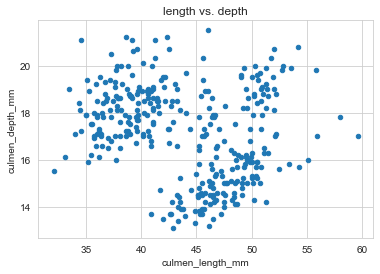

In [20]:
# Let's look at the relationship between bill depth and length using .plot() method
penguins.plot(x='culmen_length_mm', y= 'culmen_depth_mm', 
              kind='scatter', title='length vs. depth');

# If we leave out the kind parameter, we get a crazy graph...why is that?

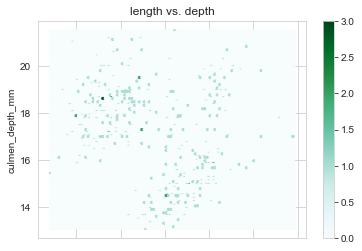

In [33]:
penguins.plot(x='culmen_length_mm', y= 'culmen_depth_mm', 
              kind='hexbin', title='length vs. depth');

Pandas has following graphs ready to deploy using .plot( ).

Enter one of the following for parameter `kind`:
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.

Check out the [documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) for more options there.

Pandas also now has its own pandas.plotting sub-library with [more options](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html) too!

These plots are good for basic EDA or exploration, but still a bit limited compared to other options. But worth staying tuned for future updates...

### Enter Matplotlib and Seaborn

#### Two Quantitative Variables: Scatterplot

##### Matplotlib

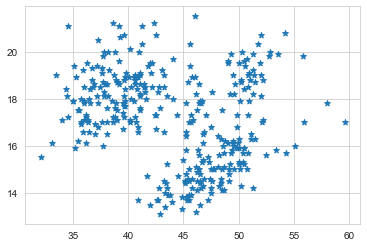

In [38]:
plt.scatter(x=penguins['culmen_length_mm'], 
            y= penguins['culmen_depth_mm'], 
            
            marker='*');


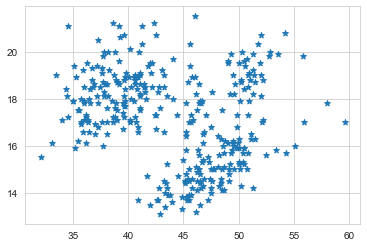

In [39]:
plt.scatter(x=penguins['culmen_length_mm'], 
            y= penguins['culmen_depth_mm'], 
            label='Penguin',
            marker='*');

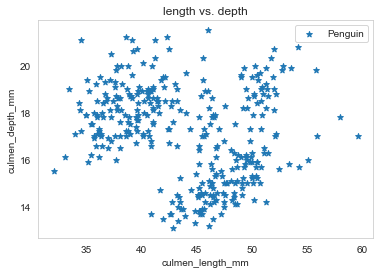

In [34]:
plt.scatter(x=penguins['culmen_length_mm'], 
            y= penguins['culmen_depth_mm'], 
            label='Penguin',
            marker='*');

plt.legend()
plt.grid(False)
plt.title('length vs. depth')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm');

#plt.show()

##### Seaborn

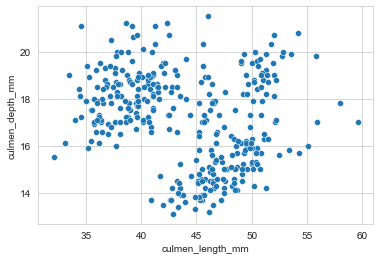

In [40]:
sns.scatterplot(x=penguins['culmen_length_mm'], y= penguins['culmen_depth_mm']);

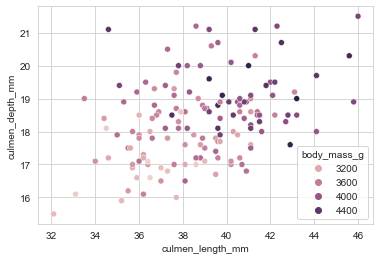

In [44]:
#sns.scatterplot(x='culmen_length_mm', y= 'culmen_depth_mm', hue='species', data=penguins);

#sns.scatterplot(x='culmen_length_mm', y= 'culmen_depth_mm', 
#                hue='sex', data=penguins);

# sns.scatterplot(x='culmen_length_mm', y= 'culmen_depth_mm', 
#                 hue='sex', palette='deep', size='body_mass_g', data=penguins);

# plt.legend('');


sns.scatterplot(x = 'culmen_length_mm',
                y = 'culmen_depth_mm',
                data=penguins[penguins['species'] == 'Adelie'],
                hue = 'body_mass_g');

In [ ]:
sns.scatterplot

#### Categorical Variables

###### Histograms

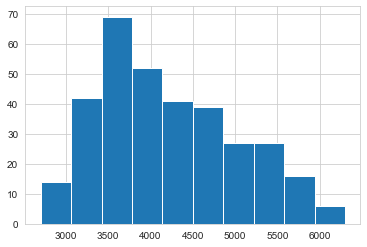

In [45]:
#use matplotlib to graph histogram of body mass
plt.hist(penguins['body_mass_g']);

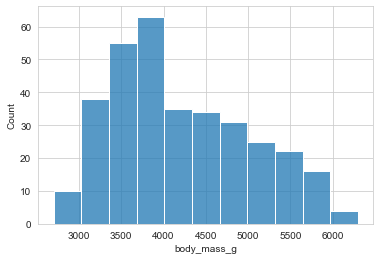

In [46]:
#use seaborn to graph histogram of body mass
sns.histplot(penguins['body_mass_g']);

## All in with Seaborn

### Scatterplot

[Seaborn Scatterplot Documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

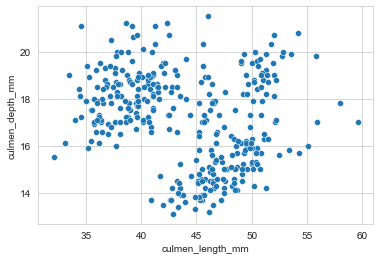

In [49]:
# Make a Seaborn scatterplot with culmen_length_mm and culmen_depth_mm
sns.scatterplot(x = 'culmen_length_mm' , # column in the dataframe
                y = 'culmen_depth_mm',   # column in the dataframe
                data = penguins );        # dataframe being used (entire or filtered)

### Boxplot

[Seaborn Boxplot Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [ ]:
# what are the datatypes you're working with?

# continuous
# categorical / discrete
# ordinal

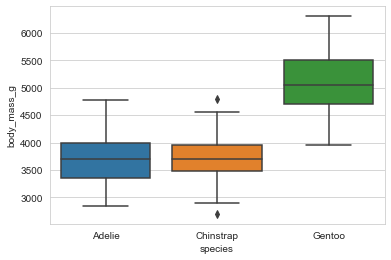

In [50]:
# Make a Seaborn boxplot with species and body_mass_g
sns.boxplot(x = 'species',
            y = 'body_mass_g',
            data = penguins);

### Violin Plot

[Seaborn Violin Plot Documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

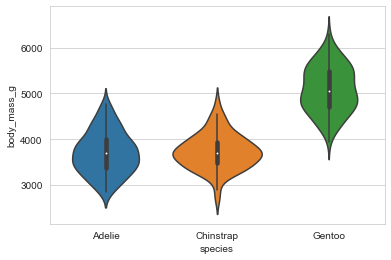

In [51]:
# Make a Seaborn violinplot with species and body_mass_g
sns.violinplot(x = 'species',
               y = 'body_mass_g', 
               data = penguins);

### Bar Plot

[Seaborn Bar Plot Documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [52]:
# Step #1 - create 
grouped = penguins.groupby('species', as_index=False)

In [53]:
# Step #2
grouped['body_mass_g'].mean()

,species,body_mass_g
0,Adelie,3706.164384
1,Chinstrap,3733.088235
2,Gentoo,5092.436975


In [54]:
# Step #3
means = grouped['body_mass_g'].mean()

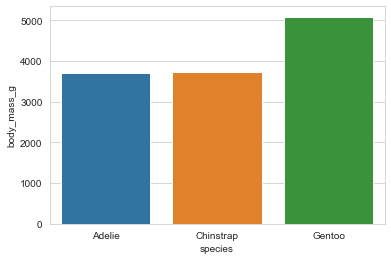

In [55]:
# Step #4 - visual representation of the output two cells above
sns.barplot(x='species', y='body_mass_g', data=means);

### Counts and Distributions

### Countplot

[Seaborn Countplot Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html)

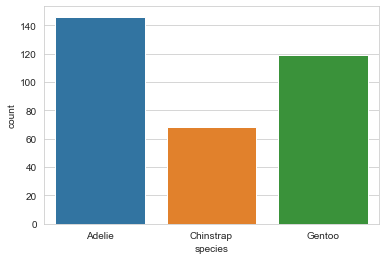

In [56]:
# Make a Seaborn countplot with the species series
sns.countplot(x = 'species', 
              data = penguins);

### Distribution Plot

[Seaborn Distplot Documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)

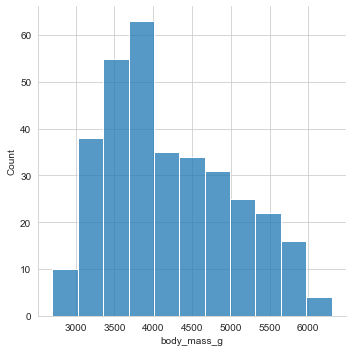

In [57]:
sns.displot(penguins['body_mass_g']);

### Jointplot

[Seaborn Jointplot Documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

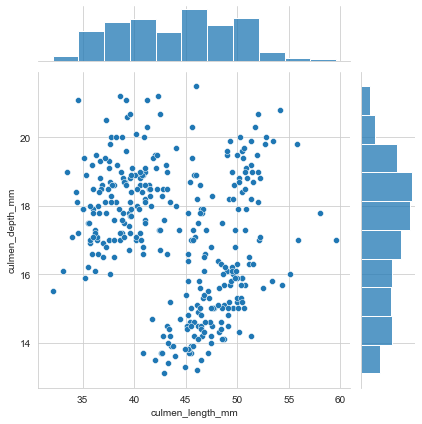

In [58]:
sns.jointplot(x=penguins['culmen_length_mm'], y=penguins['culmen_depth_mm']);

### Pairplot

[Seaborn Pairplot Documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

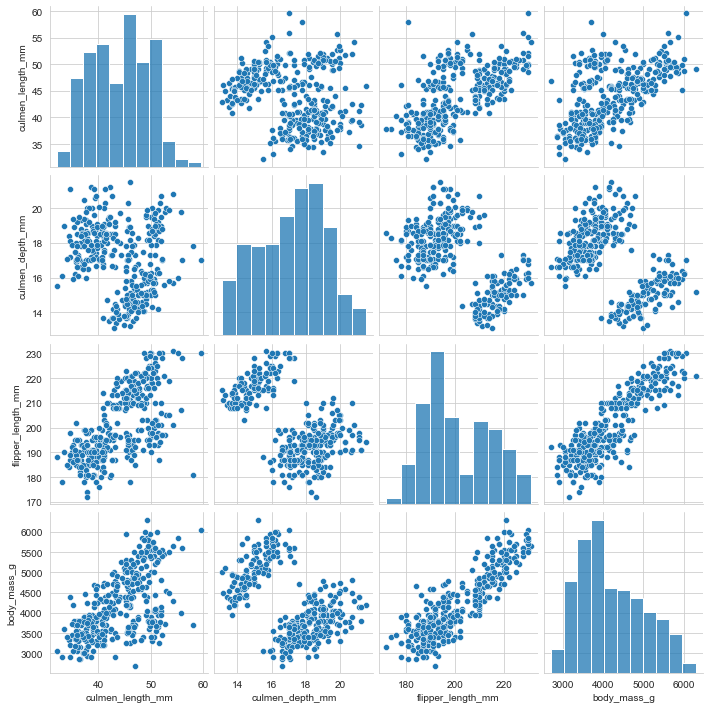

In [59]:
sns.pairplot(penguins);

### Relplot

[Seaborn Relplot Documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [ ]:
penguins['island'].value_counts()

In [ ]:
graph = sns.relplot(x='culmen_length_mm',
                    y= 'culmen_depth_mm',
                    data=penguins, hue='species', col='island')

#.set(title="Test", ylabel="Beak Depth")